This code extracts the spike times associated with particular tracks in the shortcut experiment. First, import all necessary packages. This includes an "info" script that contains session-specific information and a shortcut_general.py script that has useful functions -- currently containing general functions as well as shortcut-specific functions.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from shortcut_general import *
from R063d3_info import *
from shapely.geometry import Point, LineString, Polygon

Convert the positions to cm (instead of pixels). This could be more useful in the info script where the positions are loaded.

In [3]:
pos['x'] = pos['x'] / pxl_to_cm[0]
pos['y'] = pos['y'] / pxl_to_cm[1]

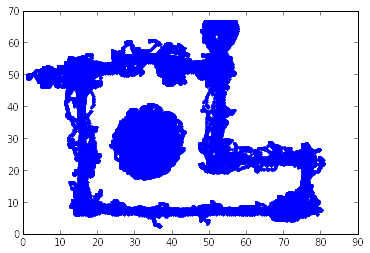

In [4]:
# Plot to check
plt.plot(pos['x'], pos['y'], 'b.')
plt.show()

## Constructing track specifics
Here, we specify the ideal linear trajectorys, and expannd those linear lines to zones by about the track width, which includes the rat positions.

In [5]:
u_line = LineString(u_trajectory)
shortcut_line = LineString(shortcut_trajectory)
novel_line = LineString(novel_trajectory)

In [6]:
u_start = Point(u_trajectory[0])
u_stop = Point(u_trajectory[-1])
shortcut_start = Point(shortcut_trajectory[0])
shortcut_stop = Point(shortcut_trajectory[-1])
novel_start = Point(novel_trajectory[0])
novel_stop = Point(novel_trajectory[-1])

expand_by = 6

def expand_line(start_pt, stop_pt, line, expand_by):
    line_expanded = line.buffer(expand_by)
    zone = start_pt.union(line_expanded).union(stop_pt)
    return zone

u_zone = expand_line(u_start, u_stop, u_line, expand_by)
shortcut_zone = expand_line(shortcut_start, shortcut_stop, shortcut_line, expand_by)
novel_zone = expand_line(novel_start, novel_stop, novel_line, expand_by)
ushort_zone = u_zone.intersection(shortcut_zone)
unovel_zone = u_zone.intersection(novel_zone)

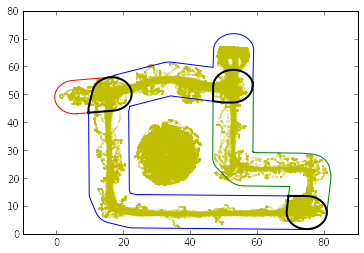

In [7]:
plt.plot(pos['x'], pos['y'], 'y.', ms=1)
plt.plot(u_zone.exterior.xy[0], u_zone.exterior.xy[1], 'b')
plt.plot(shortcut_zone.exterior.xy[0], shortcut_zone.exterior.xy[1], 'g')
plt.plot(novel_zone.exterior.xy[0], novel_zone.exterior.xy[1], 'r')
for intersect in ushort_zone:
    plt.plot(intersect.exterior.xy[0], intersect.exterior.xy[1], 'k', lw=2)
plt.plot(unovel_zone.exterior.xy[0], unovel_zone.exterior.xy[1], 'k', lw=2)
plt.show()

Below checks that the positions can be separated by zones. Just a proof-of-concept, this output is not used in the analysis but it is related to how we sort the spikes times later. 

In [8]:
u_idx = []
shortcut_idx = []
novel_idx = []
other_idx = []
for pos_idx in range(len(pos['time'])):
    point = Point([pos['x'][pos_idx], pos['y'][pos_idx]])
    if u_zone.contains(point) or ushort_zone.contains(point) or unovel_zone.contains(point):
        u_idx.append(pos_idx)
    elif shortcut_zone.contains(point):
        shortcut_idx.append(pos_idx)
    elif novel_zone.contains(point):
        novel_idx.append(pos_idx)
    else:
        other_idx.append(pos_idx)

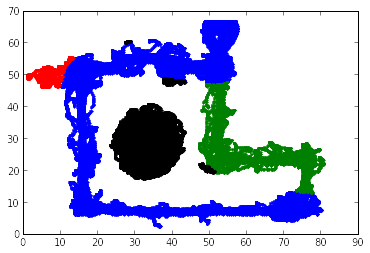

In [9]:
u_pos = idx_in_pos(pos, u_idx)
shortcut_pos = idx_in_pos(pos, shortcut_idx)
novel_pos = idx_in_pos(pos, novel_idx)
other_pos = idx_in_pos(pos, other_idx)

plt.plot(u_pos['x'], u_pos['y'], 'b.')
plt.plot(shortcut_pos['x'], shortcut_pos['y'], 'g.')
plt.plot(novel_pos['x'], novel_pos['y'], 'r.')
plt.plot(other_pos['x'], other_pos['y'], 'k.')
plt.show()

## Sorting spike times
Function that classifies each spike time based on rat position. This sorts spikes that occur while the rat is in one of four different zones: U, shortcut, novel, or other. Currently this function loops -- it may be possible to index for speedup.

In [10]:
def spikes_by_position(spikes, pos_time, pos_x, pos_y):
    spike_position = dict(u=[], shortcut=[], novel=[], other=[])
    counter = 0
    for neuron in spikes:
        neuron_spikes = dict(u=[], shortcut=[], novel=[], other=[])
        for spike in neuron:
            pos_idx = find_nearest_idx(pos_time, spike)
            point = Point([pos_x[pos_idx], pos_y[pos_idx]])
            if u_zone.contains(point) or ushort_zone.contains(point) or unovel_zone.contains(point):
                neuron_spikes['u'].append(np.asscalar(spike))
            elif shortcut_zone.contains(point):
                neuron_spikes['shortcut'].append(np.asscalar(spike))
            elif novel_zone.contains(point):
                neuron_spikes['novel'].append(np.asscalar(spike))
            else:
                neuron_spikes['other'].append(np.asscalar(spike))
        spike_position['u'].append(np.array(neuron_spikes['u']))
        spike_position['shortcut'].append(np.array(neuron_spikes['shortcut']))
        spike_position['novel'].append(np.array(neuron_spikes['novel']))
        spike_position['other'].append(np.array(neuron_spikes['other']))
        counter += 1
        print str(counter) + ' of ' + str(len(spikes)) + ' neurons completed!'
    return spike_position

Applying the function!

In [11]:
spike_position = spikes_by_position(spikes['time'], pos['time'], pos['x'], pos['y'])
print len(spikes['time'])
print len(spike_position['shortcut'])

1 of 81 neurons completed!
2 of 81 neurons completed!
3 of 81 neurons completed!
4 of 81 neurons completed!
5 of 81 neurons completed!
6 of 81 neurons completed!
7 of 81 neurons completed!
8 of 81 neurons completed!
9 of 81 neurons completed!
10 of 81 neurons completed!
11 of 81 neurons completed!
12 of 81 neurons completed!
13 of 81 neurons completed!
14 of 81 neurons completed!
15 of 81 neurons completed!
16 of 81 neurons completed!
17 of 81 neurons completed!
18 of 81 neurons completed!
19 of 81 neurons completed!
20 of 81 neurons completed!
21 of 81 neurons completed!
22 of 81 neurons completed!
23 of 81 neurons completed!
24 of 81 neurons completed!
25 of 81 neurons completed!
26 of 81 neurons completed!
27 of 81 neurons completed!
28 of 81 neurons completed!
29 of 81 neurons completed!
30 of 81 neurons completed!
31 of 81 neurons completed!
32 of 81 neurons completed!
33 of 81 neurons completed!
34 of 81 neurons completed!
35 of 81 neurons completed!
36 of 81 neurons completed!
3

The output of our function returns the spike times in the other shape than what we are used to using in our Matlab functions. For better compatibility, we reshape the spike times.

In [12]:
for key in spike_position:
    for idx in range(len(spike_position[key])):
        spike_position[key][idx] = spike_position[key][idx].reshape((len(spike_position[key][idx]),1))

Scipy saves the dictionary as a Matlab struct in a .mat file that can be open and used for later analyzes in Matlab.

In [13]:
save_path = 'C:\Users\Emily\Desktop\R063-2015-03-20_recording\spike_pos_R063d2.mat'
sio.savemat(save_path, {'spike_pos': spike_position})